# Keras Crashcourse, MNIST Handwritten Digits Classification

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
# from keras.datasets import boston_housing, fashion_mnist
import matplotlib.pyplot as plt

## mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

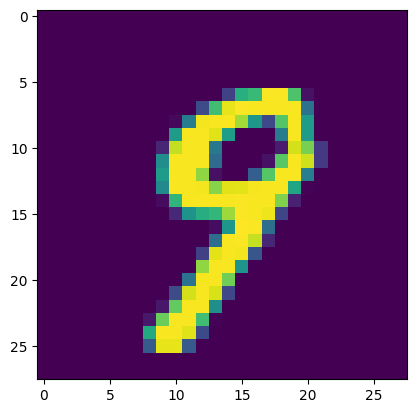

9


In [4]:
n = 2501
# plt.imshow(train_images[n,:,:])
plt.imshow(train_images[n])
plt.show()
print(train_labels[n])

In [5]:
train_labels[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

## DATA PREPROCESSING

## scaling

In [6]:
train_images[0, 15:17]  # before normalization

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=uint8)

In [7]:
# scaling of the images
train_images = (train_images / 127) - 1
test_images = (test_images / 127) - 1

In [8]:
train_images[0, 15:17]  # after normalization

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -0.64566929,
         0.46456693,  0.99212598,  0.99212598,  0.18110236, -0.78740157,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -0.87401575, -0.26771654,  0.98425197,  0.99212598,  0.47244094,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ]])

## flattening

In [9]:
# flattening images
train_images = train_images.reshape((-1, 784))  # 28 * 28 = 784
test_images = test_images.reshape((-1, 784))

In [10]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [11]:
train_images[0, 320:340]  # after flattening

array([ 0.99212598,  0.49606299, -0.98425197, -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ])

In [12]:
keras.backend.backend()

'tensorflow'

## model assembling

In [13]:
from keras.models import Sequential
from keras.layers import Dense

### way #1

In [14]:
model_1 = Sequential(name='model_one')  # the NN will have a stack form where a signal goes from one layer to another

# first hidden layer
model_1.add(Dense(units=128,  # dense (neurons are all connected) layer of 128 neurons with ReLU activation function
                              # 128 was chosen randomly, but it is advised to use a power of 2 number
                 activation='relu', 
                 input_shape=(784,)))  # shape of input layer

# adding hidden layers in cycle, just to show such possibility
for k in range(2):  # 0, 1
    model_1.add(Dense(units=10+(10-k)*10, activation='tanh'))  # units=110, 100
                                                               # 10+(10-k)*10 is just a randomly invented algorythm,
                                                               # there is no profound logic behind it

# output layer    
model_1.add(Dense(10, activation='softmax'))  # output layer of 10 neurons (=number of classes) with softmax activation function

In [15]:
# compiling function with optimizer, loss function and metrics
model_1.compile(
  optimizer='adam',
  loss=keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'],
) 

#### model layers - .summary()

In [16]:
model_1.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


    how to calculate number of parameters: 
    (layer input size + 1) * number of neurons in layer
    (784 + 1) * 128 = 100480
    (128 + 1) * 110 = 14190
    ...

### way #2

In [17]:
model_2 = Sequential([
    Dense(128, activation='tanh', input_shape=(784,)),
    Dense(110, activation='tanh'),
    Dense(100, activation='tanh'),
    Dense(10, activation='softmax'),
], name='model_two')

model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [18]:
model_2.summary()

Model: "model_two"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 110)               14190     
                                                                 
 dense_6 (Dense)             (None, 100)               11100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


#### model configuration - .get_config()

In [19]:
model_2.get_config()

{'name': 'model_two',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_4_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_4',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 784),
    'units': 128,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_5',
    'trainable': True,
    'dtype': 'float32',
    'units': 110,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias

## OHE of labels

In [20]:
# from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical

In [21]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [23]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### let's predict labels using our non-trained model - it is possible

In [24]:
y_pred = model_1.predict(test_images[:5])

1/1 [==============================] - 0s 317ms/step


In [25]:
y_pred[:5]

array([[0.08235653, 0.02811177, 0.11910478, 0.16079961, 0.09782239,
        0.13049181, 0.08642994, 0.07663834, 0.07890969, 0.13933517],
       [0.06431501, 0.04288996, 0.12660946, 0.25663617, 0.12929383,
        0.07237455, 0.08721136, 0.05954098, 0.0330205 , 0.1281082 ],
       [0.09875389, 0.04101251, 0.12932372, 0.05352023, 0.1459273 ,
        0.10196374, 0.13054425, 0.10539076, 0.0910977 , 0.10246591],
       [0.08541702, 0.03331325, 0.09930121, 0.05969624, 0.09861479,
        0.11644082, 0.15044117, 0.13539244, 0.08897039, 0.13241269],
       [0.109467  , 0.0212643 , 0.08759438, 0.14942718, 0.1481214 ,
        0.15928964, 0.08523762, 0.09559518, 0.05874484, 0.08525855]],
      dtype=float32)

In [26]:
y_class = np.argmax(y_pred, axis=1)
print(y_class)

[3 3 4 6 5]


## training cycle

#### model_1

In [27]:
# train the model
model_1.fit(    
#     train_images[:,:],
#     y_train[:,:],
    train_images,
    y_train,
    epochs=2,  # number of times the whole training dataset is passed through the model
    batch_size=32,  # number of objects (images in our case) fed to the model in one iteration
    validation_split=0.2  # share of training dataset to be used for validation
)

Epoch 1/2
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.9047 - val_loss: 0.1842 - val_accuracy: 0.9441
Epoch 2/2
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1644 - accuracy: 0.9493 - val_loss: 0.1573 - val_accuracy: 0.9523


In [28]:
# evaluate the model
model_1.evaluate(
    test_images,
    y_test
)

313/313 [==============================] - 0s 1ms/step - loss: 0.1597 - accuracy: 0.9504


[0.15966957807540894, 0.9503999948501587]

In [29]:
# predict on the first 5 test images
predictions = model_1.predict(test_images[:5])

# print our model's predictions
print('\npredictions:\t', np.argmax(predictions, axis=1))

# check our predictions against the ground truths.
print('actual labels:\t', test_labels[:5])

1/1 [==============================] - 0s 15ms/step

predictions:	 [7 2 1 0 4]
actual labels:	 [7 2 1 0 4]


#### NB! we may continue to train model_1 from the place the training stopped last time; parameters of .fit() (epochs, batch_size, validation_split) can be changed!!!

In [30]:
model_1.fit(
    train_images,
    y_train,
    epochs=15,
    batch_size=1024, 
    validation_split=0.3
)

Epoch 1/15
42/42 [==============================] - 1s 12ms/step - loss: 0.1006 - accuracy: 0.9696 - val_loss: 0.1011 - val_accuracy: 0.9699
Epoch 2/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 3/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0741 - accuracy: 0.9775 - val_loss: 0.0937 - val_accuracy: 0.9719
Epoch 4/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0674 - accuracy: 0.9798 - val_loss: 0.0915 - val_accuracy: 0.9722
Epoch 5/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0903 - val_accuracy: 0.9729
Epoch 6/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0622 - accuracy: 0.9815 - val_loss: 0.0890 - val_accuracy: 0.9730
Epoch 7/15
42/42 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.9822 - val_loss: 0.0882 - val_accuracy: 0.9731
Epoch 8/15
42/42 [=

#### model_2

In [31]:
model_2_metrics_and_losses = model_2.fit(  # metrics and losses for each epoch are to be saved in 'm2' variable
    train_images,
    y_train,
    epochs=15,
    batch_size=1024, 
    validation_split=0.2
)

Epoch 1/15
47/47 [==============================] - 1s 12ms/step - loss: 0.8492 - accuracy: 0.7609 - val_loss: 0.3423 - val_accuracy: 0.9025
Epoch 2/15
47/47 [==============================] - 0s 9ms/step - loss: 0.3031 - accuracy: 0.9102 - val_loss: 0.2436 - val_accuracy: 0.9305
Epoch 3/15
47/47 [==============================] - 0s 9ms/step - loss: 0.2300 - accuracy: 0.9323 - val_loss: 0.1983 - val_accuracy: 0.9441
Epoch 4/15
47/47 [==============================] - 0s 10ms/step - loss: 0.1842 - accuracy: 0.9456 - val_loss: 0.1823 - val_accuracy: 0.9460
Epoch 5/15
47/47 [==============================] - 0s 9ms/step - loss: 0.1550 - accuracy: 0.9539 - val_loss: 0.1532 - val_accuracy: 0.9564
Epoch 6/15
47/47 [==============================] - 0s 9ms/step - loss: 0.1302 - accuracy: 0.9621 - val_loss: 0.1396 - val_accuracy: 0.9605
Epoch 7/15
47/47 [==============================] - 0s 9ms/step - loss: 0.1097 - accuracy: 0.9679 - val_loss: 0.1261 - val_accuracy: 0.9639
Epoch 8/15
47/47 [

In [32]:
# evaluate the model
model_2.evaluate( 
    test_images,
    y_test
)

313/313 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 0.9718


[0.09003838896751404, 0.9718000292778015]

In [33]:
# predict on the first 5 test images
predictions = model_2.predict(test_images[:5])

# print our model's predictions
print('\npredictions:\t', np.argmax(predictions, axis=1))

# check our predictions against the ground truths.
print('actual labels:\t', test_labels[:5])

1/1 [==============================] - 0s 63ms/step

predictions:	 [7 2 1 0 4]
actual labels:	 [7 2 1 0 4]


#### let's print metrics and losses for each epoch - .history

In [34]:
model_2_metrics_and_losses.history

{'loss': [0.8492423295974731,
  0.30314409732818604,
  0.2299642711877823,
  0.18424052000045776,
  0.15499377250671387,
  0.13020355999469757,
  0.10971392691135406,
  0.09566406905651093,
  0.0841713696718216,
  0.07146935164928436,
  0.06548616290092468,
  0.05799650028347969,
  0.04811204597353935,
  0.04376370087265968,
  0.04440248757600784],
 'accuracy': [0.7608749866485596,
  0.9102083444595337,
  0.9322500228881836,
  0.945645809173584,
  0.9539166688919067,
  0.9620624780654907,
  0.9679375290870667,
  0.9720625281333923,
  0.9759374856948853,
  0.9802708625793457,
  0.981166660785675,
  0.9832708239555359,
  0.9868124723434448,
  0.9877708554267883,
  0.9869166612625122],
 'val_loss': [0.34232059121131897,
  0.2435722053050995,
  0.19834455847740173,
  0.18233519792556763,
  0.15315492451190948,
  0.13958103954792023,
  0.1261255443096161,
  0.11975874751806259,
  0.10832636803388596,
  0.10701281577348709,
  0.10460726916790009,
  0.0977749451994896,
  0.09495628625154495,


## learning curve

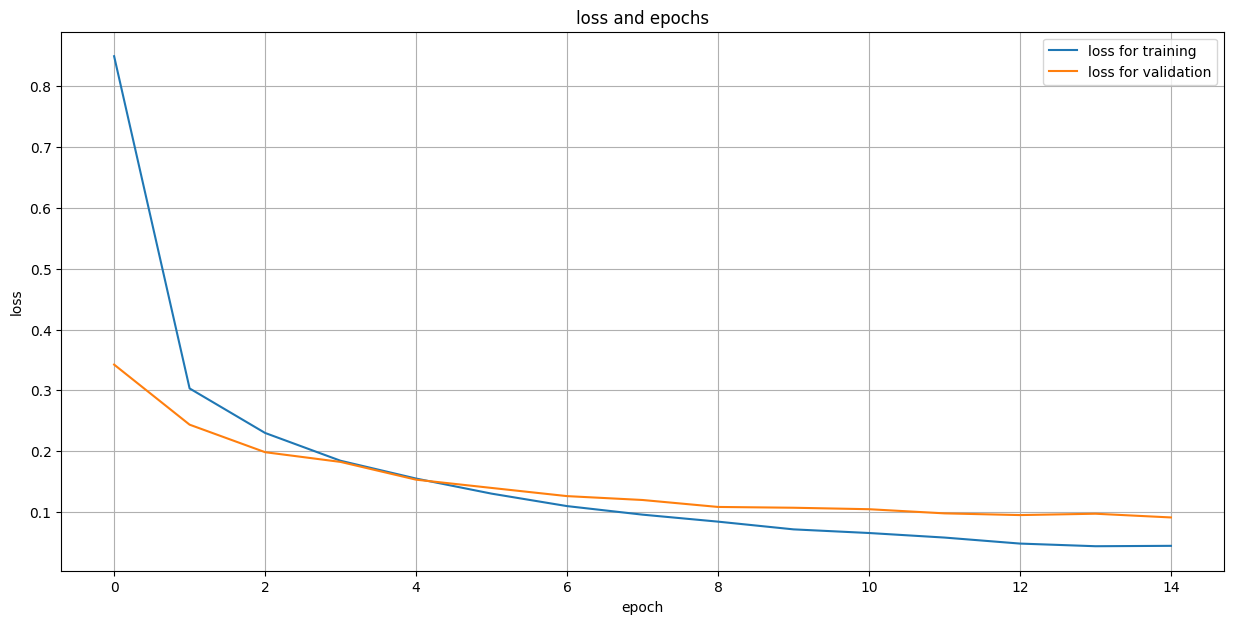

In [35]:
plt.figure(figsize=(15,7))
plt.plot(model_2_metrics_and_losses.history['loss'], label = 'loss for training')
plt.plot(model_2_metrics_and_losses.history['val_loss'], label = 'loss for validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('loss and epochs')
plt.show()

## saving and loading model weights

In [36]:
# saving model weights
# model_2.save_weights('model_2.h5')

# loading model weights
# model_2.load_weights('model_2.h5')

## testing different optimizers

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

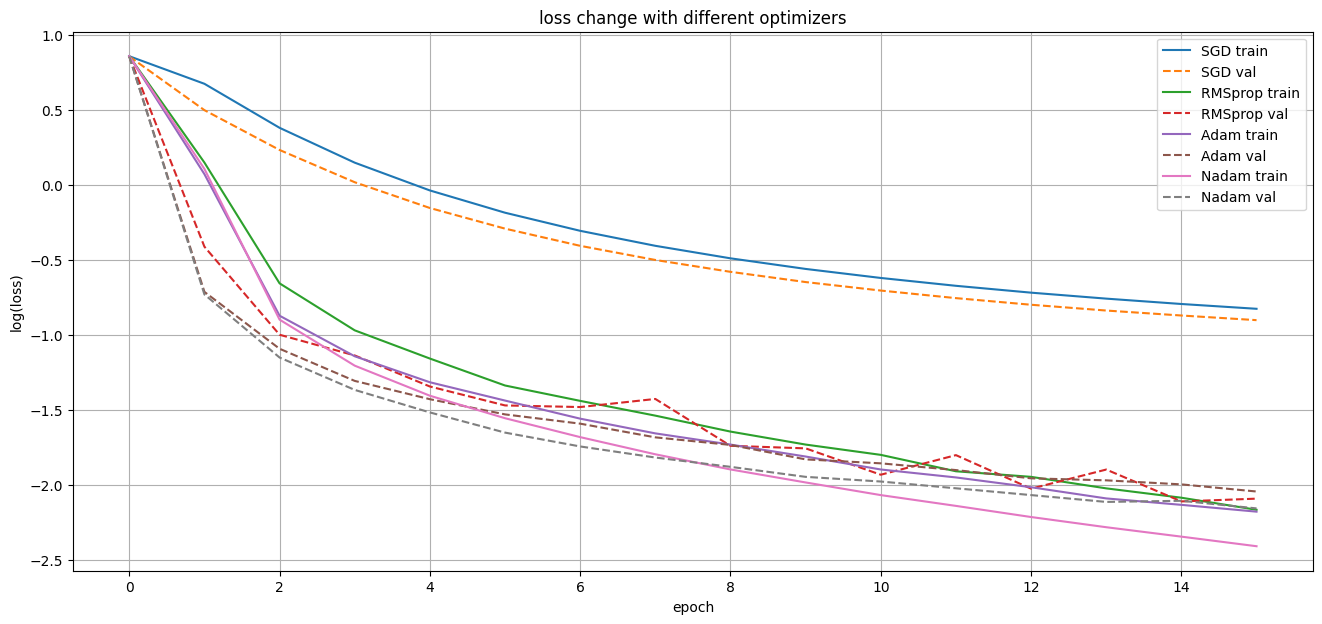

In [37]:
# basis model creation
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

# saving weights of the model
# the model is not fitted/trained!!!
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# setting epochs
epochs = 15
# vector for plotting results
epochs_vector = np.arange(epochs+1)

# trying different optimizers
for optimizer_ in ['SGD', 'RMSProp', 'adam', 'NAdam']:
    # creation of a working model 'model_' where we will load weights saved before
    model_ = Sequential([
        Dense(64, activation='relu', input_shape=(784,)),
        Dense(64, activation='tanh'),
        Dense(10, activation='softmax')
    ])
    
    # loading weights
    model_.load_weights('model.h5')
    
    # compiling model_ with an optimizer
    model_.compile(
        optimizer=optimizer_,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    # computing loss before fitting/training
    loss_train_0 = model_.evaluate(train_images[:48000], to_categorical(train_labels[:48000]), verbose=0)[0]
    loss_valid_0 = model_.evaluate(train_images[48000:], to_categorical(train_labels[48000:]), verbose=0)[0]
    
    # model_ fitting/training
    metrics_and_losses = model_.fit(  # metrics_and_losses is model's callback
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=1024, validation_split=0.2, verbose = 0
    )
    
    # plot
    plt.plot(epochs_vector, 
             np.log([loss_train_0]+metrics_and_losses.history['loss']),
             '-',
             label=model_.optimizer.get_config()['name']+' train')
    plt.plot(epochs_vector, 
             np.log([loss_valid_0]+metrics_and_losses.history['val_loss']),
             '--',
             label=model_.optimizer.get_config()['name']+' val')
    
plt.legend()
plt.grid('On')

plt.title('loss change with different optimizers')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [38]:
model_.optimizer.get_config()

{'name': 'Nadam',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': False,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

## predictions (with the last model in the cycle above)

1/1 [==============================] - 0s 45ms/step


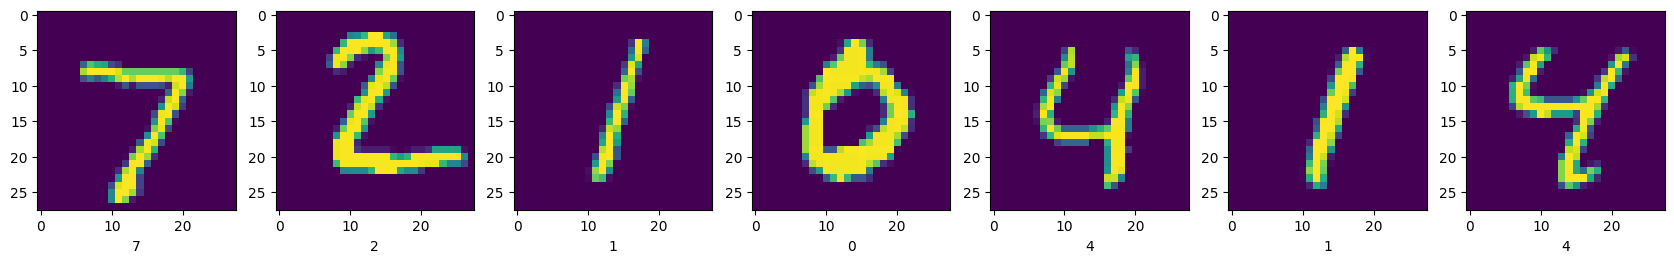

In [39]:
n = 7
y_pred = model_.predict(test_images[:n])
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize =(3*n, 5))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(test_images[i, :].reshape(28, 28))
    plt.xlabel(str(y_pred_class[i]))
plt.show()

In [40]:
y_pred.shape, y_pred[0]

((7, 10),
 array([1.07260035e-04, 2.63274760e-05, 1.35847877e-04, 2.49910005e-03,
        5.44126260e-06, 4.35709080e-05, 5.05179287e-07, 9.96825099e-01,
        3.20173058e-05, 3.24787194e-04], dtype=float32))

In [41]:
y_pred_class

array([7, 2, 1, 0, 4, 1, 4], dtype=int64)

In [42]:
test_labels[:n]

array([7, 2, 1, 0, 4, 1, 4], dtype=uint8)

#### syntax variant

In [43]:
y_pred = model_(test_images[:n])  # the same as 'model_.predict(test_images[:n])'
np.argmax(y_pred, axis=1)

array([7, 2, 1, 0, 4, 1, 4], dtype=int64)

## indexes of wrongly predicted objects

In [44]:
y_pred = model_(test_images)  # all test images label prediction
y_pred = np.argmax(y_pred, axis=1)
np.where(test_labels != y_pred)[0]

array([   8,   61,  124,  149,  233,  247,  259,  321,  352,  412,  445,
        447,  478,  495,  507,  528,  531,  582,  610,  619,  659,  684,
        689,  691,  707,  717,  720,  740,  760,  844,  924,  938,  947,
        951,  965,  982, 1003, 1014, 1032, 1039, 1044, 1062, 1073, 1112,
       1182, 1194, 1198, 1224, 1226, 1228, 1232, 1242, 1247, 1260, 1283,
       1289, 1299, 1319, 1325, 1326, 1328, 1337, 1364, 1378, 1393, 1413,
       1414, 1469, 1494, 1500, 1522, 1530, 1549, 1553, 1609, 1671, 1681,
       1709, 1717, 1721, 1751, 1754, 1773, 1790, 1850, 1878, 1880, 1901,
       1903, 1913, 1938, 1941, 1952, 1970, 2016, 2018, 2024, 2035, 2040,
       2043, 2044, 2053, 2070, 2098, 2109, 2115, 2118, 2121, 2125, 2129,
       2130, 2131, 2135, 2182, 2186, 2224, 2272, 2291, 2293, 2369, 2371,
       2387, 2395, 2422, 2488, 2526, 2548, 2560, 2607, 2648, 2654, 2730,
       2877, 2896, 2907, 2921, 2925, 2927, 2939, 2945, 2953, 2979, 3005,
       3060, 3073, 3117, 3130, 3157, 3189, 3206, 32

In [45]:
y_pred[7], test_labels[7]  # no error

(9, 9)

In [46]:
y_pred[8], test_labels[8]  # error (from the list)

(2, 5)